In [16]:
import glob
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [17]:
tif_files = glob.glob("/mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_2025*.tif")
datasets = []
for f in tif_files:
    ds = gdal.Open(f)
    if ds is not None:
        print(f"Opened: {f}")
        datasets.append(ds)
    else:
        print(f"Failed to open: {f}")
print(f"\nTotal opened files: {len(datasets)}")

Opened: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250831T0723_ALL_Tile_0_0_bd62.tif
Opened: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250804T0716_ALL_Tile_0_0_1ec4.tif
Opened: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250730T0716_ALL_Tile_0_0_88ae.tif
Opened: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250829T0716_ALL_Tile_0_0_c614.tif
Opened: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250819T0716_ALL_Tile_0_0_31bc.tif
Opened: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250814T0716_ALL_Tile_0_0_1bf3.tif
Opened: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250824T0716_ALL_Tile_0_0_c9b7.tif
Opened: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250725T0716_ALL_Tile_0_0_e314.tif

Total opened files: 8


In [25]:
# Reading metadata
ds = datasets[1]
print("Driver:", ds.GetDriver().ShortName, "/", ds.GetDriver().LongName)
print("Raster size:", ds.RasterXSize, "x", ds.RasterYSize)
print("Number of bands:", ds.RasterCount)

Driver: GTiff / GeoTIFF
Raster size: 2400 x 1991
Number of bands: 14


In [ ]:
for i, ds in enumerate(datasets[:8]):
    filename = os.path.basename(ds.GetDescription())
    match = re.search(r"2025\d{4}", filename)
    date_str = match.group(0) if match else "Unknown"
    print(date_str)

20250831
20250804
20250730
20250829
20250819
20250814
20250824
20250725


In [27]:
all_bands_data = []
for i, ds in enumerate(datasets, start=1):
    num_bands = ds.RasterCount
    print(f"\nDataset {i}: {ds.GetDescription()}")
    print(f"  Number of bands: {num_bands}")
    bands_data = np.array([ds.GetRasterBand(b+1).ReadAsArray() for b in range(num_bands)])
    print(f"  bands_data shape: {bands_data.shape}")
    all_bands_data.append(bands_data)


Dataset 1: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250831T0723_ALL_Tile_0_0_bd62.tif
  Number of bands: 14
  bands_data shape: (14, 1991, 2400)

Dataset 2: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250804T0716_ALL_Tile_0_0_1ec4.tif
  Number of bands: 14
  bands_data shape: (14, 1991, 2400)

Dataset 3: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250730T0716_ALL_Tile_0_0_88ae.tif
  Number of bands: 14
  bands_data shape: (14, 1991, 2400)

Dataset 4: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250829T0716_ALL_Tile_0_0_c614.tif
  Number of bands: 14
  bands_data shape: (14, 1991, 2400)

Dataset 5: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250819T0716_ALL_Tile_0_0_31bc.tif
  Number of bands: 14
  bands_data shape: (14, 1991, 2400)

Dataset 6: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250814T0716_ALL_Tile_0_0_1bf3.tif
  Number of bands: 14
  bands_data shape: (14, 1991, 2400)

Dataset 7: /mnt/Data/Optical/Sentinel_2/Iran_Tehran/S2_MS_20250824T0716_ALL

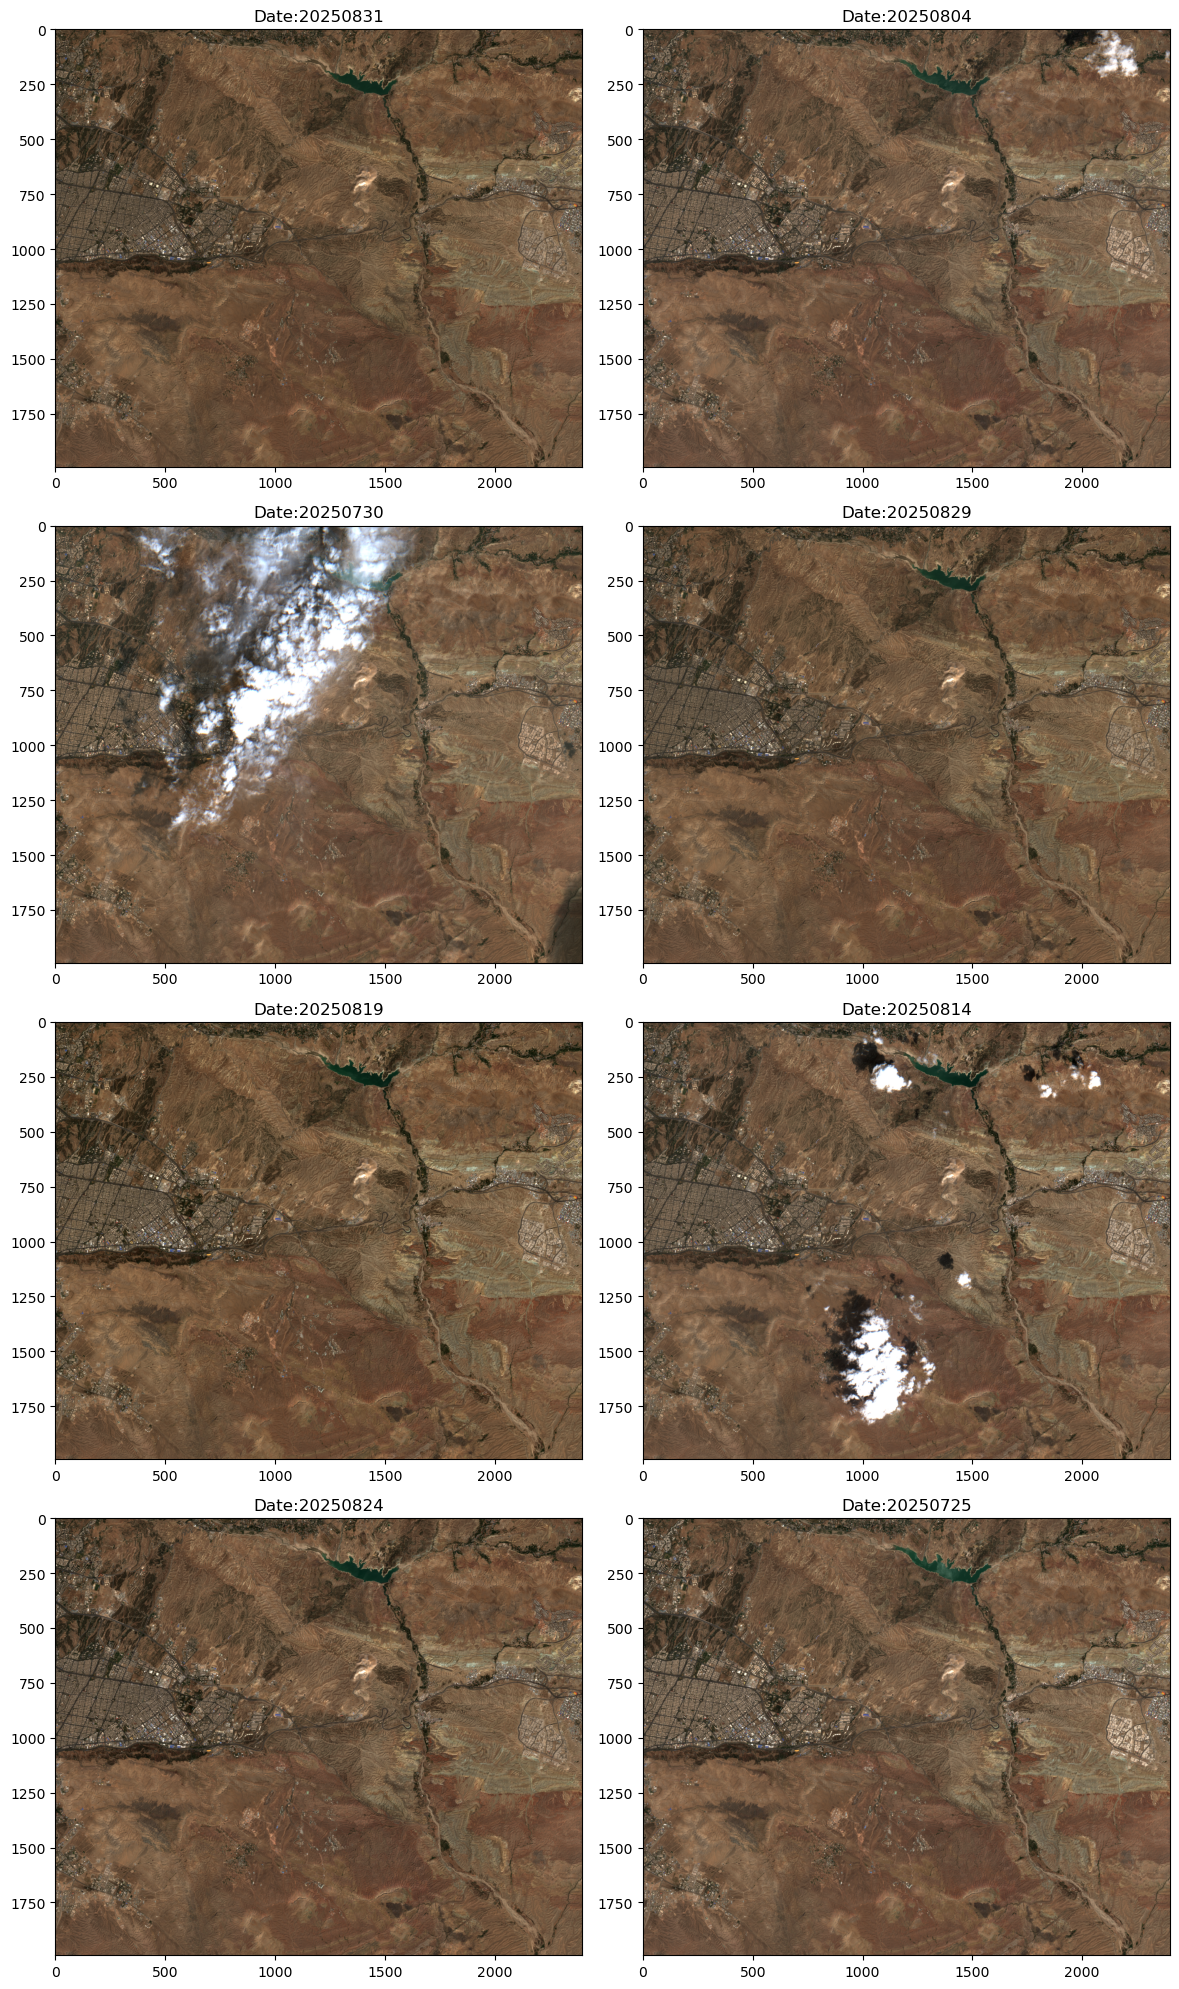

In [39]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
axes = axes.flatten()

for i, ds in enumerate(datasets[:8]):
    bands_data = np.array([ds.GetRasterBand(b+1).ReadAsArray() for b in range(ds.RasterCount)])
    rgb_img = bands_data[[3, 2, 1], :, :].astype(np.float32)  
    rgb_img = np.moveaxis(rgb_img, 0, -1)
    rgb_stretched = np.clip((rgb_img - 1000) / (6000 - 1000), 0, 1)
    axes[i].imshow(rgb_stretched)

    filename = os.path.basename(ds.GetDescription())
    match = re.search(r"2025\d{4}", filename)
    date_str = match.group(0) if match else "Unknown"

    axes[i].set_title(f"Date:{date_str}")

plt.tight_layout()
plt.show()

/tmp/ipykernel_12539/2721143233.py:11: RuntimeWarning: invalid value encountered in divide
  ndvi = (bands_data[7] - bands_data[3]) / (bands_data[7] + bands_data[3])


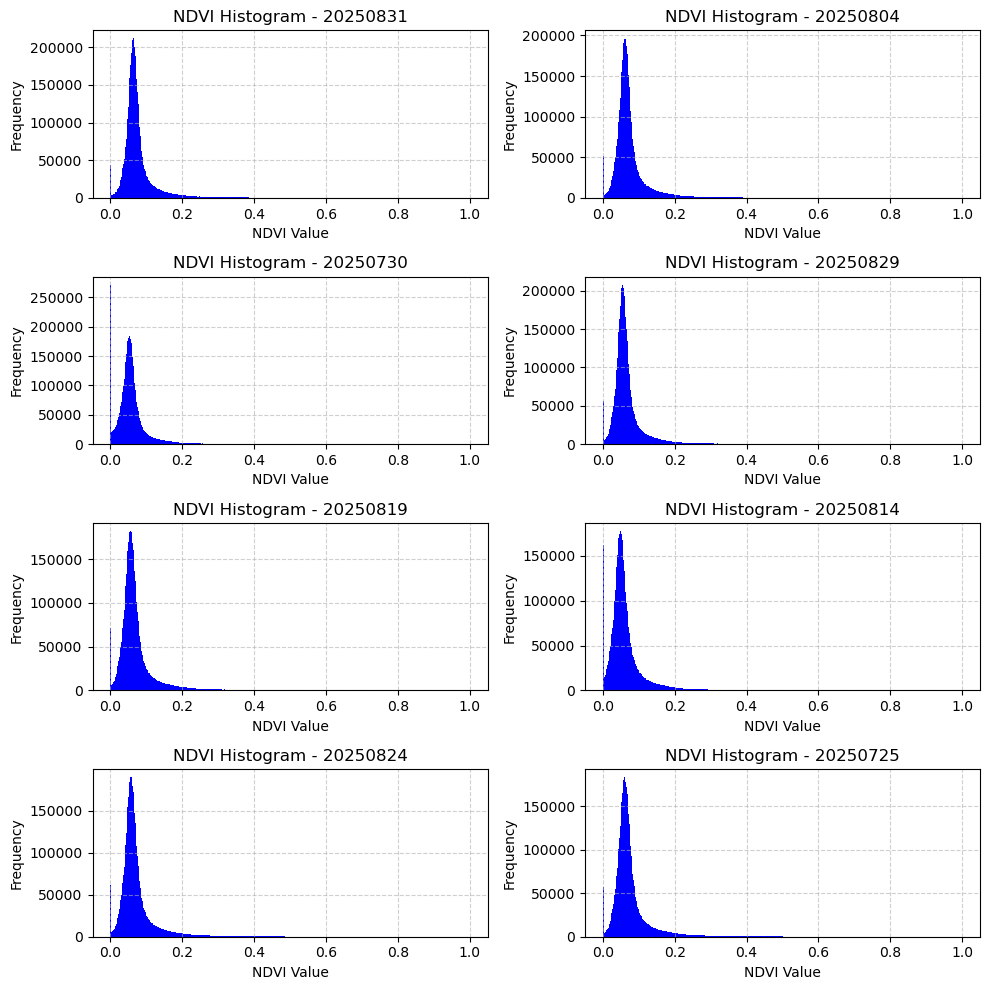

In [ ]:

fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()

for i, ds in enumerate(datasets[:8]):
    filename = os.path.basename(ds.GetDescription())
    match = re.search(r"2025\d{4}", filename)
    date_str = match.group(0) if match else "Unknown"

    bands_data = np.array([ds.GetRasterBand(b+1).ReadAsArray() for b in range(ds.RasterCount)])

    ndvi = (bands_data[7] - bands_data[3]) / (bands_data[7] + bands_data[3])
    ndvi = np.where((ndvi > 1) | (ndvi < 0), 0, ndvi)  # clip to [0,1]

    axes[i].hist(ndvi.flatten(), bins=512, range=(0, 1), color='blue')
    axes[i].set_title(f"NDVI Histogram - {date_str}")
    axes[i].set_xlabel("NDVI Value")
    axes[i].set_ylabel("Frequency")
    axes[i].grid(True, linestyle="--", alpha=0.6)

for j in range(i+1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

(100, 100, 3)


<Figure size 1000x500 with 0 Axes>

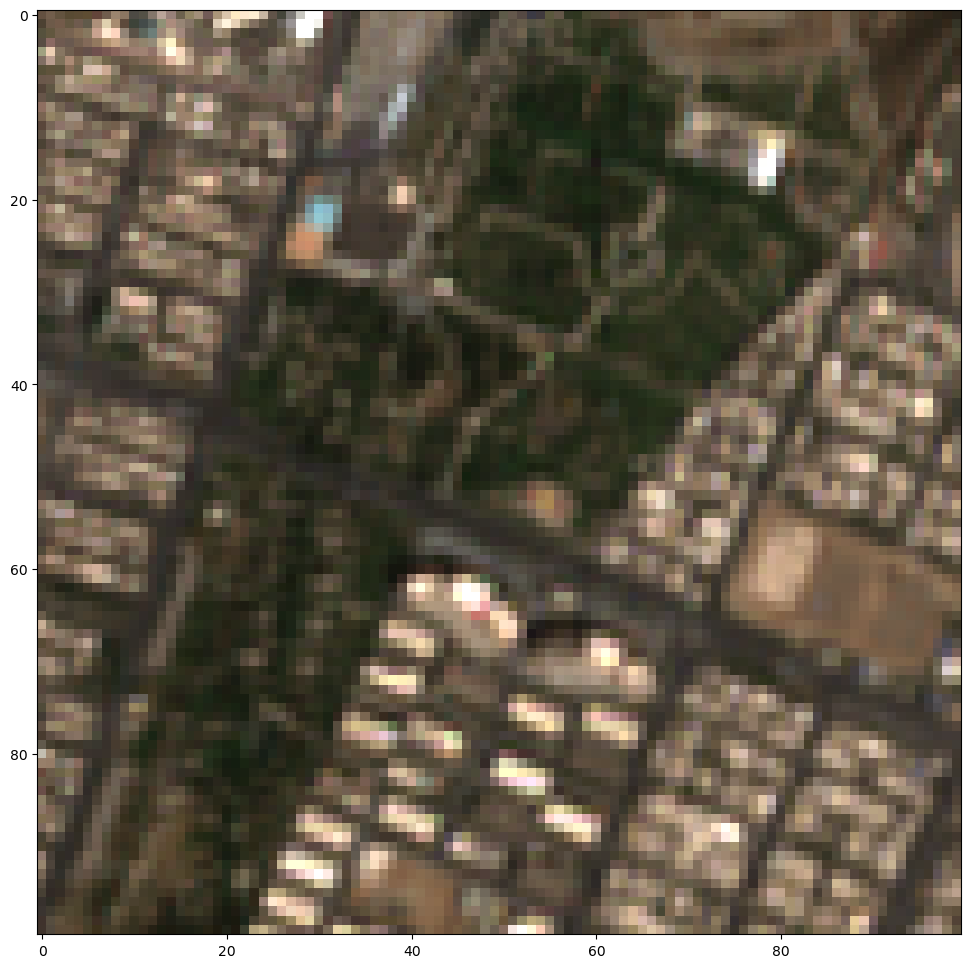

In [56]:
i = 3 # Red channel
j = 2 # Green channel
k = 1 # Blue channel

plt.figure(figsize=(10,5))
rgb_img = bands_data[[i, j, k], :, :].astype(np.float32)
rgb_img_cropped = rgb_stretched[610:710, 225:325].copy()
print(rgb_img_cropped.shape)
plt.figure(figsize=(12, 12))
plt.imshow(rgb_img_cropped)
plt.show()

/tmp/ipykernel_12539/2550489910.py:11: RuntimeWarning: invalid value encountered in divide
  ndvi = (bands_data[7] - bands_data[3]) / (bands_data[7] + bands_data[3])


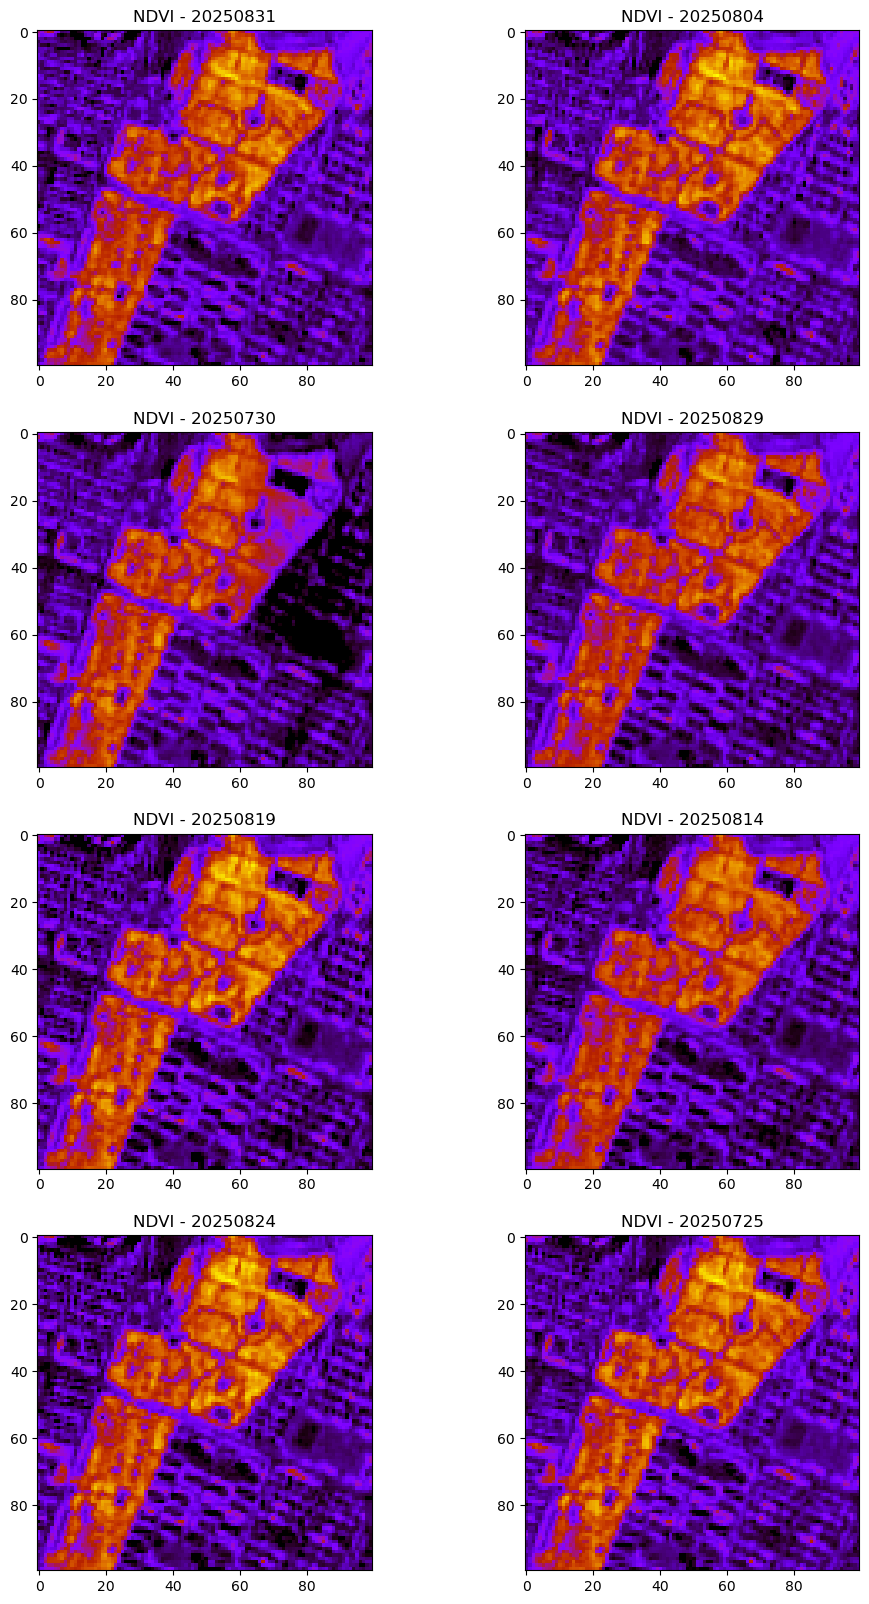

In [50]:
fig, axes = plt.subplots(4, 2, figsize=(12, 20))
axes = axes.flatten()

for i, ds in enumerate(datasets[:8]):
    filename = os.path.basename(ds.GetDescription())
    match = re.search(r"2025\d{4}", filename)
    date_str = match.group(0) if match else "Unknown"

    bands_data = np.array([ds.GetRasterBand(b+1).ReadAsArray() for b in range(ds.RasterCount)])

    ndvi = (bands_data[7] - bands_data[3]) / (bands_data[7] + bands_data[3])
    ndvi = np.where((ndvi > 1) | (ndvi < 0), 0, ndvi)

    ndvi_cropped = ndvi[610:710, 225:325].copy()

    axes[i].imshow(ndvi_cropped, vmin=0, vmax=0.6, cmap="gnuplot")
    axes[i].set_title(f"NDVI - {date_str}", fontsize=12)

plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()